In [83]:
import json
import numpy as np

from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [11]:
# read file
with open('bible.json', 'r') as myfile:
    data=myfile.read()

# parse file
bible_dict = json.loads(data)

In [12]:
bible_dict.keys()

dict_keys(['Ge', 'Ex', 'Le', 'Nu', 'De', 'Jos', 'Jg', 'Ru', '1Sa', '2Sa', '1Ki', '2Ki', '1Ch', '2Ch', 'Ezr', 'Ne', 'Es', 'Job', 'Ps', 'Pr', 'Ec', 'Song', 'Isa', 'Jer', 'La', 'Eze', 'Da', 'Ho', 'Joe', 'Am', 'Ob', 'Jon', 'Mic', 'Na', 'Hab', 'Zep', 'Hag', 'Zec', 'Mal', 'Mt', 'Mr', 'Lu', 'Joh', 'Ac', 'Ro', '1Co', '2Co', 'Ga', 'Eph', 'Php', 'Col', '1Th', '2Th', '1Ti', '2Ti', 'Tit', 'Phm', 'Heb', 'Jas', '1Pe', '2Pe', '1Jo', '2Jo', '3Jo', 'Jude', 'Re'])

In [13]:
short2long = {
    'Ge':'Genesis',
    'Ex':'Exodus',
    'Le':'Leviticus',
    'Nu':'Numbers',
    'De':'Deuteronomy',
    'Jos':'Joshua',
    'Jg':'Judges',
    'Ru':'Ruth',
    '1Sa':'1 Samuel',
    '2Sa':'2 Samuel',
    '1Ki':'1 Kings',
    '2Ki':'2 Kings',
    '1Ch':'1 Chronicles',
    '2Ch':'2 Chronicles',
    'Ezr':'Ezra',
    'Ne':'Nehemiah',
    'Es':'Esther',
    'Job':'Job',
    'Ps':'Psalms',
    'Pr':'Proverbs',
    'Ec':'Ecclesiastes',
    'Song':'Song of Solomon',
    'Isa':'Isaiah',
    'Jer':'Jeremiah',
    'La':'Lamentations',
    'Eze':'Ezekiel',
    'Da':'Daniel',
    'Ho':'Hosea',
    'Joe':'Joel',
    'Am':'Amos',
    'Ob':'Obadiah',
    'Jon':'Jonah',
    'Mic':'Micah',
    'Na':'Nahum',
    'Hab':'Habakkuk',
    'Zep':'Zephaniah',
    'Hag':'Haggai',
    'Zec':'Zechariah',
    'Mal':'Malachi',
    'Mt':'Matthew',
    'Mr':'Mark',
    'Lu':'Luke',
    'Joh':'John',
    'Ac':'Acts',
    'Ro':'Romans',
    '1Co':'1 Corinthians',
    '2Co':'2 Corinthians',
    'Ga':'Galatians',
    'Eph':'Ephesians',
    'Php':'Philippians',
    'Col':'Colossians',
    '1Th':'1 Thessalonians',
    '2Th':'2 Thessalonians',
    '1Ti':'1 Timothy',
    '2Ti':'2 Timothy',
    'Tit':'Titus',
    'Phm':'Philemon',
    'Heb':'Hebrews',
    'Jas':'James',
    '1Pe':'1 Peter',
    '2Pe':'2 Peter',
    '1Jo':'1 John',
    '2Jo':'2 John',
    '3Jo':'3 John',
    'Jude':'Jude',
    'Re':'Revelation'
}

In [62]:
documents = [TaggedDocument(bible_dict[bk], [short2long[bk]]) for bk in list(bible_dict.keys())]
model = Doc2Vec(documents, min_count=2, epochs=100)

In [73]:
model.docvecs.most_similar(positive=['Luke'],negative=['Acts'])

[('Philippians', 0.39065104722976685),
 ('2 Timothy', 0.29214441776275635),
 ('Philemon', 0.280139297246933),
 ('Galatians', 0.2727055251598358),
 ('Amos', 0.24909383058547974),
 ('Psalms', 0.20347388088703156),
 ('Hosea', 0.20340344309806824),
 ('1 Corinthians', 0.19534991681575775),
 ('Ephesians', 0.16948166489601135),
 ('Daniel', 0.16765975952148438)]

In [90]:
from sklearn.cluster import AgglomerativeClustering

In [117]:
heir = AgglomerativeClustering(linkage='average',
        connectivity=None, n_clusters=10)
X = model.docvecs.vectors_docs
heir.fit(X, y=None)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=10,
                        pooling_func='deprecated')

In [118]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [119]:
import matplotlib.pyplot as plt

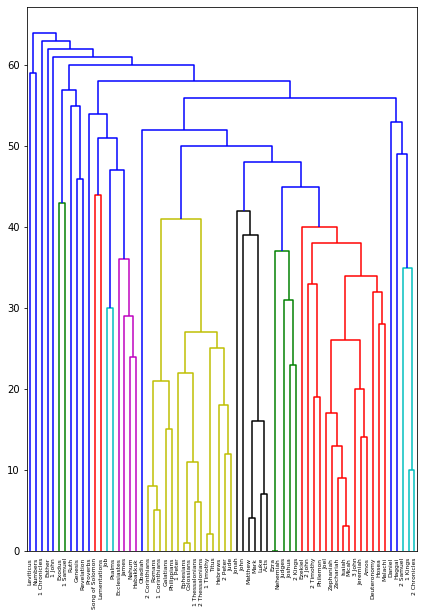

In [129]:
fig = plt.figure(figsize=(7,10))
plot_dendrogram(heir, labels=list(short2long.values()))
plt.savefig('heir.png')